Importing installing Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('/content/weather_classification_data.csv')

Data Understanding

In [63]:
df.head(10)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,3,1010.82,2,3,3.5,1,1
1,39.0,96,8.5,71.0,3,1011.43,7,1,10.0,1,0
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,2,3
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,0,3
4,27.0,74,17.0,66.0,2,990.67,1,3,2.5,2,1
5,32.0,55,3.5,26.0,2,1010.03,2,2,5.0,1,0
6,-2.0,97,8.0,86.0,2,990.87,1,3,4.0,1,2
7,3.0,85,6.0,96.0,3,984.46,1,3,3.5,1,2
8,3.0,83,6.0,66.0,2,999.44,0,3,1.0,2,2
9,28.0,74,8.5,107.0,0,1012.13,8,3,7.5,0,3


Null Values and duplicate values

In [4]:
df.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.shape

(13200, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


Feature Engineering

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Weather Type'] = le.fit_transform(df['Weather Type'])
df['Location'] = le.fit_transform(df['Location'])
df['Cloud Cover'] = le.fit_transform(df['Cloud Cover'])
df['Season'] = le.fit_transform(df['Season'])

In [8]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [9]:
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')

Target Variable Understanding

In [10]:
df['Weather Type'].value_counts()

Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64

Correlation Understanding

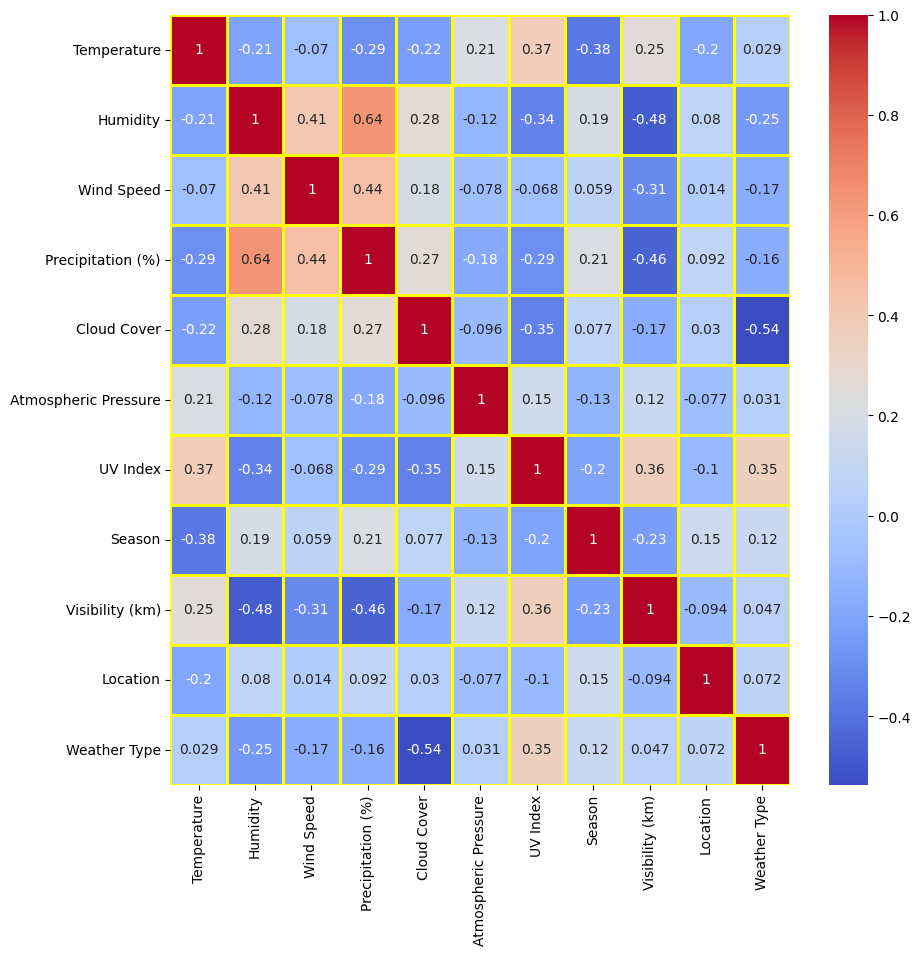

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm',linecolor='yellow',linewidths=0.95)
plt.show()

Outlier Detection

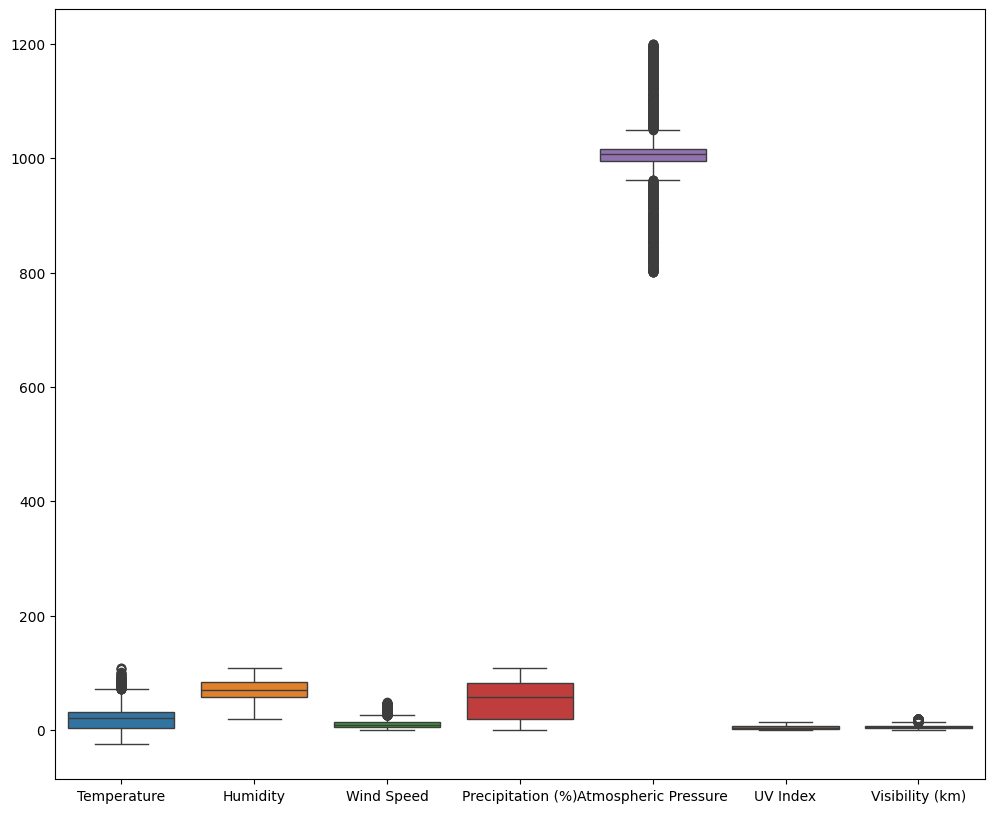

In [11]:
plt.figure(figsize=(12,10))
sns.boxplot(df)
plt.show()

There are no much deviation in the data, hence no outliers

Feature Splitting, Train test split

In [19]:
X1 = df.drop('Weather Type', axis=1)
y1 = df['Weather Type']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.30, random_state=42)

Model Building

LGBM

In [21]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()

In [22]:
clf.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001591 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 722
[LightGBM] [Info] Number of data points in the train set: 9240, number of used features: 10
[LightGBM] [Info] Start training from score -1.371256
[LightGBM] [Info] Start training from score -1.382837
[LightGBM] [Info] Start training from score -1.405085
[LightGBM] [Info] Start training from score -1.386294


LGBMClassifier()

In [23]:
y_pred = clf.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, y_pred))

0.9131313131313131


In [25]:

print(confusion_matrix(y_test, y_pred))

[[853  56  25  21]
 [ 55 891  20  16]
 [ 23  16 974  20]
 [ 41  26  25 898]]


In [27]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       955
           1       0.90      0.91      0.90       982
           2       0.93      0.94      0.94      1033
           3       0.94      0.91      0.92       990

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.91      0.91      0.91      3960



ExtraTreesClassifier

In [28]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train, y_train)

ExtraTreesClassifier()

In [29]:
y_pred2 = model.predict(X_test)

In [30]:
print(accuracy_score(y_test, y_pred2))

0.9101010101010101


In [31]:
print(confusion_matrix(y_test, y_pred2))

[[852  58  23  22]
 [ 56 894  19  13]
 [ 30  20 970  13]
 [ 55  32  15 888]]


In [32]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       955
           1       0.89      0.91      0.90       982
           2       0.94      0.94      0.94      1033
           3       0.95      0.90      0.92       990

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.91      0.91      0.91      3960



RidgeClassifier

In [36]:
from sklearn.linear_model import RidgeClassifier
model1 = RidgeClassifier()
model1.fit(X_train, y_train)

RidgeClassifier()

In [37]:
y_pred3 = model1.predict(X_test)

In [38]:
print(accuracy_score(y_test, y_pred3))

0.7919191919191919


In [39]:
print(confusion_matrix(y_test, y_pred3))

[[735 103  53  64]
 [ 44 745 156  37]
 [ 28  10 967  28]
 [194  69  38 689]]


In [40]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75       955
           1       0.80      0.76      0.78       982
           2       0.80      0.94      0.86      1033
           3       0.84      0.70      0.76       990

    accuracy                           0.79      3960
   macro avg       0.79      0.79      0.79      3960
weighted avg       0.79      0.79      0.79      3960



RidgeClassifierCV

In [43]:
from sklearn.linear_model import RidgeClassifierCV
model3 = RidgeClassifierCV()
model3.fit(X_train, y_train)

RidgeClassifierCV()

In [44]:
y_pred4 = model3.predict(X_test)

In [45]:
print(accuracy_score(y_test, y_pred4))

0.7919191919191919


In [47]:
print(confusion_matrix(y_test, y_pred4))

[[735 103  53  64]
 [ 44 745 156  37]
 [ 28  10 967  28]
 [194  69  38 689]]


In [48]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75       955
           1       0.80      0.76      0.78       982
           2       0.80      0.94      0.86      1033
           3       0.84      0.70      0.76       990

    accuracy                           0.79      3960
   macro avg       0.79      0.79      0.79      3960
weighted avg       0.79      0.79      0.79      3960



Bagging Classifier

In [49]:
from sklearn.ensemble import BaggingClassifier
model4 = BaggingClassifier()
model4.fit(X_train, y_train)

BaggingClassifier()

In [50]:
y_pred5 = model4.predict(X_test)

In [51]:
print(accuracy_score(y_test, y_pred5))

0.9085858585858586


In [52]:
print(confusion_matrix(y_test, y_pred5))

[[860  50  21  24]
 [ 67 883  13  19]
 [ 28  27 961  17]
 [ 45  23  28 894]]


In [53]:
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       955
           1       0.90      0.90      0.90       982
           2       0.94      0.93      0.93      1033
           3       0.94      0.90      0.92       990

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.91      0.91      0.91      3960



Voting Classifier

In [55]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [56]:
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier()
clf3 = SVC()

In [57]:
ensemble = VotingClassifier(estimators=[('lr', clf1), ('knn', clf2), ('svc', clf3)], voting='hard')

In [58]:
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('knn', KNeighborsClassifier()), ('svc', SVC())])

In [59]:
y_pred6 = ensemble.predict(X_test)

In [60]:
print(accuracy_score(y_test, y_pred6))

0.8611111111111112


In [61]:
print(confusion_matrix(y_test, y_pred6))

[[776 106  33  40]
 [ 50 874  42  16]
 [ 39  14 967  13]
 [ 75  96  26 793]]


In [62]:
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       955
           1       0.80      0.89      0.84       982
           2       0.91      0.94      0.92      1033
           3       0.92      0.80      0.86       990

    accuracy                           0.86      3960
   macro avg       0.86      0.86      0.86      3960
weighted avg       0.86      0.86      0.86      3960



Predicative Model building

In [64]:
input_data = (14.0,73,9.5,82.0,3,1010.82,2,3,3.5,1)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = clf.predict(input_data_reshaped)
print(prediction)

[1]


In [65]:
input_data1 = (30.0,64,7.0,16.0,0,1018.72,5,1,5.5,2)
input_data_as_numpy_array1 = np.asarray(input_data1)
input_data_reshaped1 = input_data_as_numpy_array1.reshape(1,-1)
prediction1 = model.predict(input_data_reshaped1)
print(prediction1)

[3]


Pickling file

In [66]:
import pickle
pickle.dump(clf, open('weather_classification.pkl', 'wb'))